# Hidden Markov Models on fetal lamb movements monitoring

The following needs loading:

In [1]:
# install.packages("depmixS4")
library(depmixS4)

Warning message:
"package 'depmixS4' was built under R version 3.6.3"Loading required package: nnet
Warning message:
"package 'nnet' was built under R version 3.6.3"Loading required package: MASS
Loading required package: Rsolnp
Warning message:
"package 'Rsolnp' was built under R version 3.6.3"Loading required package: nlme


In [2]:
x<- '000001010000001010000220000100110011100100000000000000000020100000000000000000100000732324000010000000102000010000100000000000000100000210010001011000100100012000101101002012112101100110001110400200000000000000000000000000000000000000000000'
x<- strsplit(x, "")[[1]]
x<- as.vector(as.numeric((x)))
y<- c(1:240)

In [3]:
df <- as.data.frame(cbind(y,x))
colnames(df) = c("Intervals", "Move_per_interval")
head(df)

Intervals,Move_per_interval
1,0
2,0
3,0
4,0
5,0
6,1


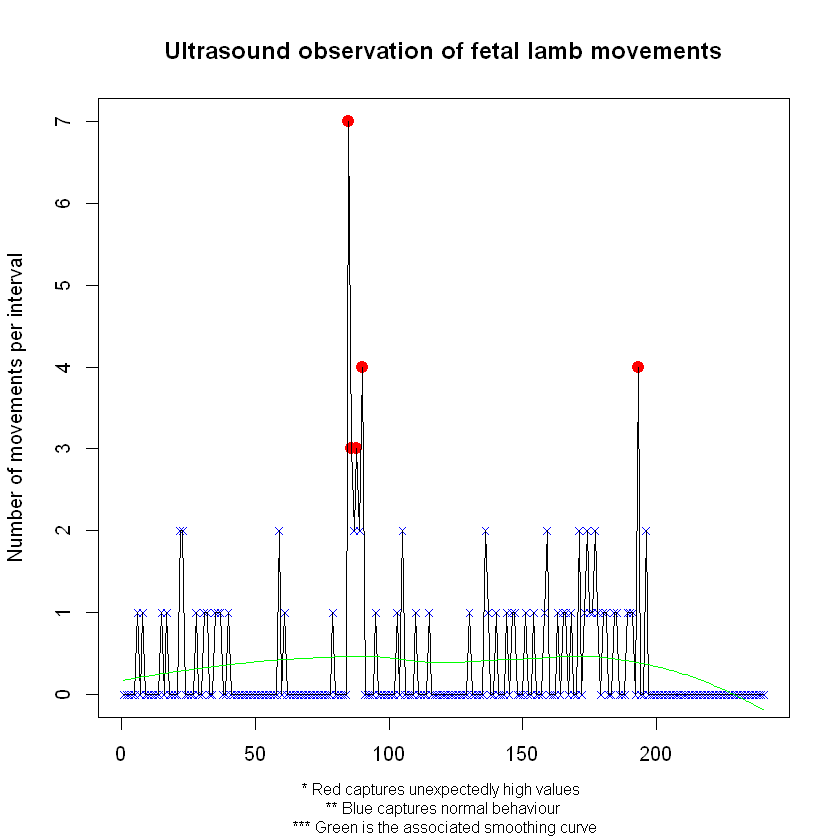

In [4]:
# png(file="LambMove.png")
plot(x~y, ylab="Number of movements per interval", xlab="",
main = "Ultrasound observation of fetal lamb movements",
type = 'p', col=ifelse(x>=3,'red', 'blue'), pch=ifelse(x>=3, 19, 4),
cex=ifelse(x>=3, 1.3, 0.75), sub="* Red captures unexpectedly high values \n ** Blue captures normal behaviour \n *** Green is the associated smoothing curve",
cex.sub= 0.8)
lines(x~y, col='black')
M<- loess(x~y, data=df)
fit<- fitted(M)
lines(fit, col='green')
# dev.off()


The following loads the HMM:

In [7]:
mod <- depmix(x~y, data = df, nstates=4, family=poisson())
mod
fm <- fit(mod)

Initial state probabilities model 
 pr1  pr2  pr3  pr4 
0.25 0.25 0.25 0.25 

Transition matrix 
       toS1 toS2 toS3 toS4
fromS1 0.25 0.25 0.25 0.25
fromS2 0.25 0.25 0.25 0.25
fromS3 0.25 0.25 0.25 0.25
fromS4 0.25 0.25 0.25 0.25

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept) Re1.y
St1               0     0
St2               0     0
St3               0     0
St4               0     0

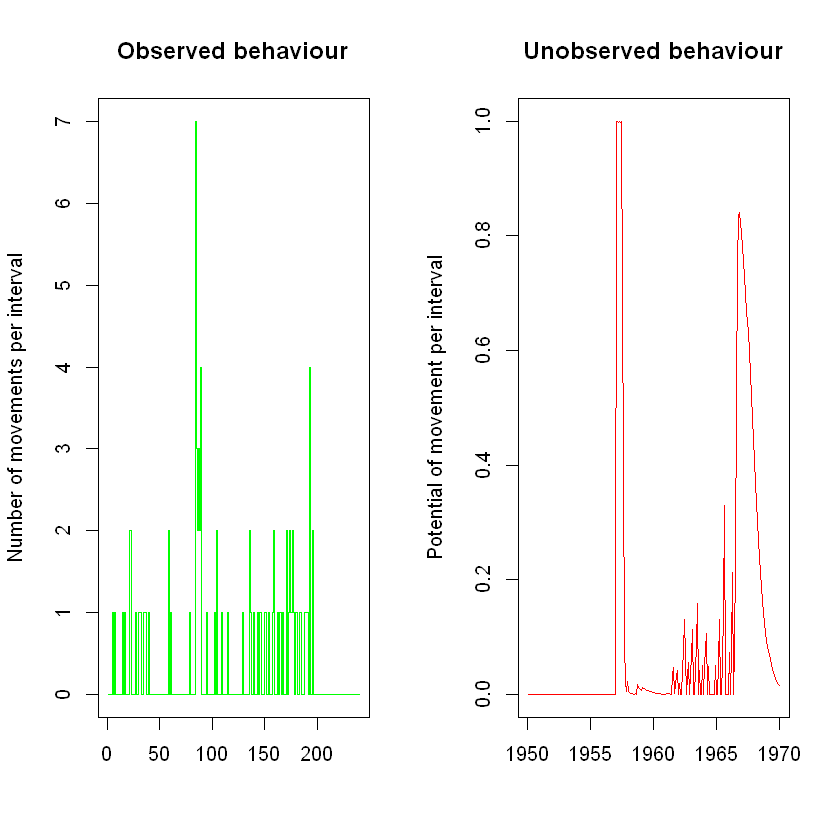

In [9]:
# png(file="HMM+NormalLamb.png")
op <- par(mfrow=c(1,2))
plot(x~y, ylab="Number of movements per interval", xlab="",
main = "Observed behaviour", type = 'S', col="green")
plot(ts(posterior(fm)[,2], start=c(1950,2),deltat=1/12),
ylab = "Potential of movement per interval", xlab="", main= "Unobserved behaviour", col = "red")
par(op)
# dev.off()